In [1]:
import collections
import inspect

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import litholog
from litholog import utils
from litholog.sequence import io, BedSequence

## Load the raw `csv` data

In [2]:
# Converts 'string' arrays to numpy
transforms = {c : utils.string2array_pandas for c in ['depth_m', 
                                                      'grain_size_mm', 
                                                      'grain_size_psi']}

# Read the demo data
beds = pd.read_csv('../data/demo_sequences.csv', converters=transforms)

beds.head()

,name,count,collection,eod,eodnum,tops,th,gs_tops_mm,gs_tops_psi,snd_shl,mean_gs_mm,mean_gs_psi,max_gs_mm,max_gs_psi,ng,ar,depth_m,grain_size_mm,grain_size_psi
0,Pukearuhue,226,Mount Messenger,levee,3,66.907008,0.234645,0.001000,-9.9658,0.0,0.001000,-9.9658,0.001000,-9.9658,0.602931,0.08134,"[66.907, 66.6724]","[0.001, 0.001]","[-9.9658, -9.9658]"
1,Pukearuhue,226,Mount Messenger,levee,3,66.672363,0.933692,0.122591,-3.0281,1.0,0.129950,-2.9440,0.133845,-2.9014,0.602931,0.08134,"[66.6724, 66.5795, 66.3448, 66.1151, 65.9244, ...","[0.1226, 0.1262, 0.1285, 0.1315, 0.1331, 0.133...","[-3.028, -2.9862, -2.9602, -2.9269, -2.9094, -..."
2,Pukearuhue,226,Mount Messenger,levee,3,65.738672,0.232201,0.105433,-3.2456,1.0,0.105433,-3.2456,0.105433,-3.2456,0.602931,0.08134,"[65.7387, 65.5065]","[0.1054, 0.1054]","[-3.2461, -3.2461]"
3,Pukearuhue,226,Mount Messenger,levee,3,65.506471,0.222424,0.115450,-3.1147,1.0,0.137917,-2.8581,0.150254,-2.7345,0.602931,0.08134,"[65.5065, 65.4918, 65.4356, 65.372, 65.3476, 6...","[0.1154, 0.1203, 0.1306, 0.1446, 0.1503, 0.1503]","[-3.1153, -3.0553, -2.9368, -2.7899, -2.7341, ..."
4,Pukearuhue,226,Mount Messenger,levee,3,65.284047,0.193093,0.110490,-3.1780,1.0,0.129487,-2.9491,0.141708,-2.8190,0.602931,0.08134,"[65.284, 65.2327, 65.1716, 65.1301, 65.091]","[0.1105, 0.1221, 0.1329, 0.1417, 0.1417]","[-3.1779, -3.0339, -2.9116, -2.8191, -2.8191]"


## Convert groups to `BedSequence`s

In [3]:
# Columns shared by whole sequences
METACOLS = ['name', 'count', 'collection', 'eod', 'eodnum', 'ng', 'ar']

# Columns of bed-level data
DATACOLS = ['th', 'gs_tops_mm', 'snd_shl', 'depth_m',
            'gs_tops_mm', 'mean_gs_mm', 'max_gs_mm', 'grain_size_mm',
            'gs_tops_psi', 'mean_gs_psi', 'max_gs_psi', 'grain_size_psi']

# Convert to a list of `BedSequence`s
seqs = []
for name, seq_df in beds.groupby('name'):
    seqs.append(
        BedSequence.from_dataframe(
            seq_df, 
            thickcol='th',
            component_map=litholog.defaults.DEFAULT_COMPONENT_MAP,
            metacols=METACOLS,
            datacols=DATACOLS,
        )
    )
    

# Show name + eod + number of beds of each
[(s.metadata['name'], s.metadata['eod'], len(s)) for s in seqs]

[('Karoo krf1', 'fan', 105),
 ('Karoo krf10', 'fan', 221),
 ('Karoo krf11', 'fan', 47),
 ('Karoo krf12', 'fan', 35),
 ('Karoo krf13', 'fan', 51),
 ('Karoo krf14', 'fan', 96),
 ('Karoo krf15', 'fan', 54),
 ('Karoo krf16', 'fan', 167),
 ('Karoo krf17', 'fan', 97),
 ('Karoo krf2', 'fan', 20),
 ('Karoo krf3', 'fan', 42),
 ('Karoo krf4', 'fan', 15),
 ('Karoo krf5', 'fan', 51),
 ('Karoo krf6', 'fan', 288),
 ('Karoo krf7', 'fan', 205),
 ('Karoo krf8', 'fan', 244),
 ('Karoo krf9', 'fan', 191),
 ('Magnolia', 'fan', 180),
 ('Pukearuhue', 'levee', 209)]

In [4]:
# Choose one to use as an example
example_seq = seqs[0]
print(example_seq.metadata)

{'name': 'Karoo krf1', 'count': 146, 'collection': 'Karoo', 'eod': 'fan', 'eodnum': 1, 'ng': 0.7726148858605799, 'ar': 0.104761904761905}


## Basic Plotting

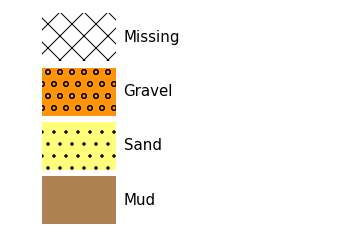

In [5]:
litholog.defaults.litholegend.plot()

## Flipping depth -> elevation

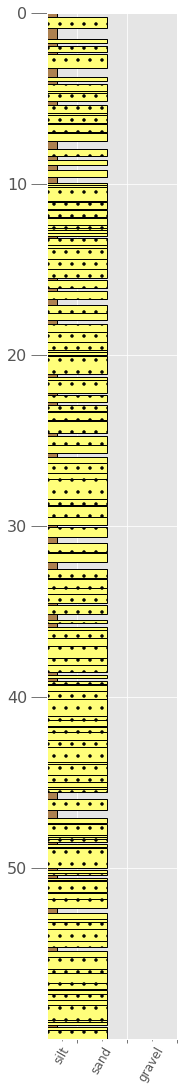

In [6]:
# depth version (this is only depth-ordered one in demo)
seqs[-2].plot(legend=litholog.defaults.litholegend, 
             fig_width=3, aspect=5, wentworth='coarse')

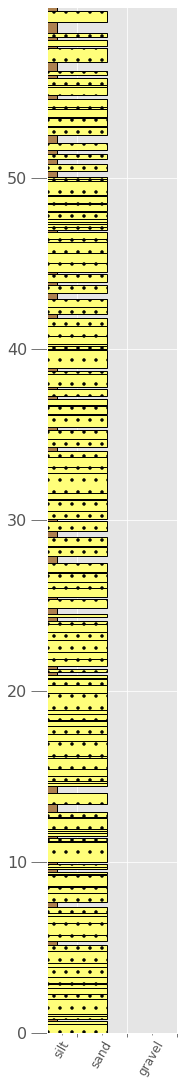

In [7]:
# to elevation
seqs[-2].flip_convention(depth_key='depth_m').plot(
             legend=litholog.defaults.litholegend, 
             fig_width=3, aspect=5, wentworth='coarse')

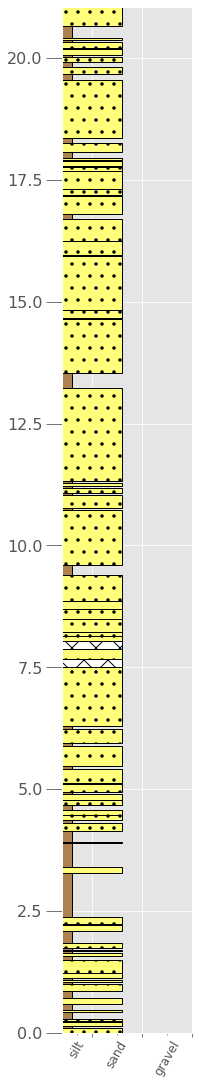

In [8]:
# Specify a legend when plotting (otherwise random used)
# `wentworth` can use 'fine' or 'coarse' bins

# elevation_version
example_seq.plot(legend=litholog.defaults.litholegend, 
                 fig_width=3, aspect=5, wentworth='coarse')

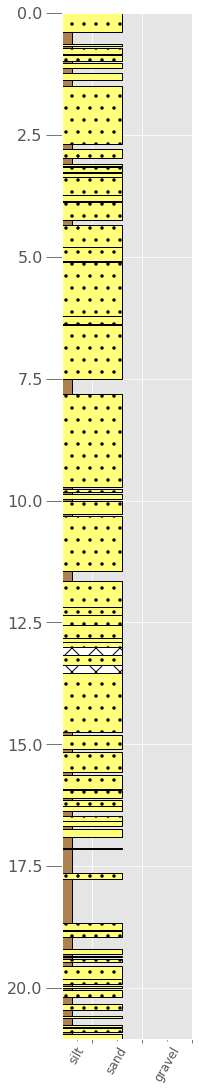

In [18]:
# to depth
example_seq.flip_convention(depth_key='depth_m').plot(
          legend=litholog.defaults.litholegend, 
          fig_width=3, aspect=5, wentworth='coarse')

In [10]:
example_seq.order

'elevation'

In [11]:
example_seq.shift(delta=-example_seq.stop.z).order

'depth'

# Some Basic Stats Properties

In [12]:
print(example_seq.metadata)

# Properties computed on the fly
example_seq.net_to_gross, example_seq.amalgamation_ratio

{'name': 'Karoo krf1', 'count': 146, 'collection': 'Karoo', 'eod': 'fan', 'eodnum': 1, 'ng': 0.7726148858605799, 'ar': 0.104761904761905}


(0.7726148858605802, 0.11)

In [13]:
# Hurst statistics
print(example_seq.hurst_K('th', 'sand'))

# Returns (D, p, hurst_K)
example_seq.hurst_D('th', 'sand', nsamples=10000)

0.8224151068655668


(2.8998431666227575, 0.0011, 0.8224151068655668)

# Pseudo-gamma curves

In [14]:
def suggest_figsize(sequence, aspect=10):
    """
    Defining default a total thickness -> figure size mapping.
    """
    suggest_h = max(10, min(sequence.cum, 50))
    suggest_w = suggest_h / aspect
    return (suggest_w, suggest_h)


def strip_fig_extra_columns(ax_num, sequence, ncols, exxon_style=True, figsize=None, aspect=10):
    """
    Creates a fig with `ncol` axes and plots `sequence` on one of them.
    If `exxon_style`, plots `sequence` on first axis, otherwise last axis.
    Returns
    -------
    fig, ax
    """
    w, h = suggest_figsize(sequence, aspect=aspect)
    print(w, h)

    fig, ax = plt.subplots(ncols=ncols, sharey=True, figsize=(w*ncols, h))
    #fig.subplots_adjust(wspace=0.)

    sequence.plot(legend=litholog.defaults.litholegend,
                  width_field='grain_size_psi',
                  depth_field='depth_m',
                  ax=ax[ax_num])

    return fig, ax

2.338050702353454 21.042456321181085


/home/ross/anaconda3/envs/depstrat/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


(0.0, 200.0)

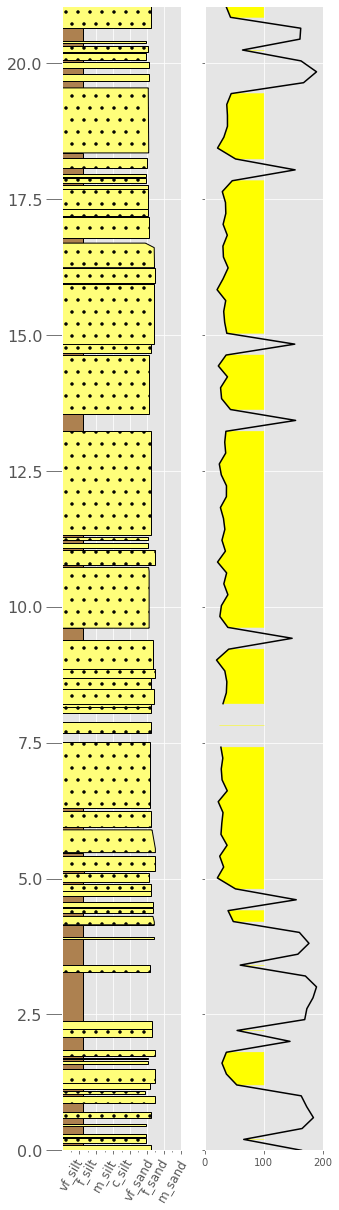

In [15]:
# Showing default values:
ds, pgr = example_seq.pseudo_gamma_simple(
    gs_field='grain_size_mm',
    depth_field='depth_m',
    resolution=0.2,
    gs_cutoff=0.0625,
    gamma_range=(30, 180),
    sigma=0.1,
    noise=10.
)

fig, ax = strip_fig_extra_columns(0, example_seq, 2, aspect=9)

cutoff = 100

ax[1].plot(pgr, ds, 'k')
ax[1].fill_betweenx(ds, pgr, np.repeat(cutoff, ds.size), where=(pgr<cutoff), color='yellow')

ax[1].set_xlim([0,200])

# Ignore below here for now

In [16]:






def gradient_fill(x, y, ax, pos_or_neg,
                  fill_color=None,
                  **kwargs):
    """
    Plot a line with a linear alpha gradient filled beneath it.
    Parameters
    ----------
    x, y : array-like
        The data values of the line.
    ax : a matplotlib Axes instance
        The axes to plot on.
    fill_color : a matplotlib color specifier (string, tuple) or None
        The color for the fill. If None, the color of the line will be used.
    Additional arguments are passed on to matplotlib's ``plot`` function.
    Returns
    -------
    line : a Line2D instance
        The line plotted.
    im : an AxesImage instance
        The transparent gradient clipped to just the area beneath the curve.
    """
    x[np.argwhere(np.isnan(x))] = 0.

    line, = ax.plot(x, y, **kwargs)
    if fill_color is None:
        fill_color = line.get_color()

    zorder = line.get_zorder()
    alpha = line.get_alpha()
    alpha = 1.0 if alpha is None else alpha

    if pos_or_neg=='positive':
        alpha_gradient = np.linspace(0.2, alpha, 100)
        xmin, xmax = 0., ax.get_xlim()[1]
    else:
        alpha_gradient = np.linspace(alpha, 0.2, 100)
        xmin, xmax = ax.get_xlim()[0], 0.

    z = np.empty((1, 100, 4), dtype=float)
    z[:,:,-1] = alpha_gradient[None,:]

    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:,:,:3] = rgb

    ymin, ymax = y.min(), y.max()
    im = ax.imshow(z, aspect='auto', extent=[xmin, xmax, ymin, ymax],
                   origin='lower', zorder=zorder)

    xy = np.column_stack([x, y])
    xy = np.flipud(xy) if y[0] < y[1] else xy   # Have to flip order for 'depth'-ordered striplogs
    if pos_or_neg=='positive':
        xy = np.vstack([[xmin, ymax], xy, [xmin, ymin], [xmin, ymax]])
    else:
        xy = np.vstack([[xmax, ymax], xy, [xmax, ymin], [xmax, ymax]])

    clip_path = Polygon(xy, facecolor='none', edgecolor='none', closed=True)
    ax.add_patch(clip_path)
    im.set_clip_path(clip_path)

    #ax.autoscale(True)
    return line, im

# Plotting with convolution "gamma ray"

2.338050702353454 21.042456321181085


NameError: name 'Gaussian1DKernel' is not defined

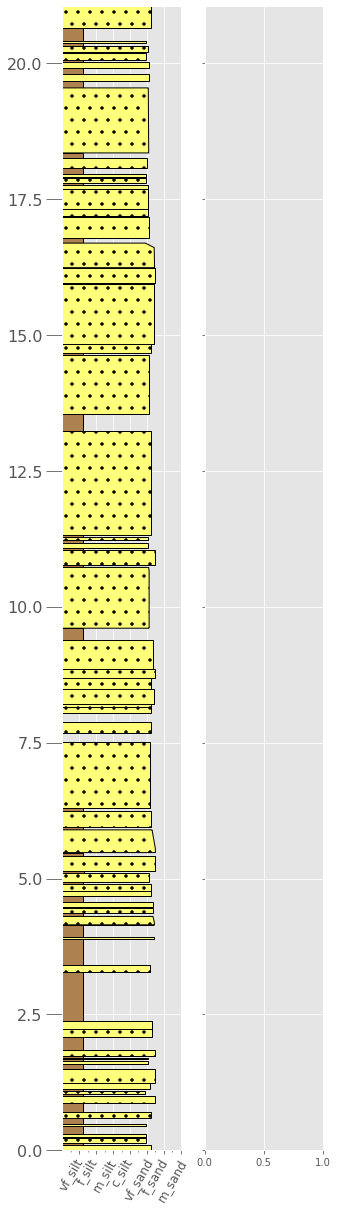

In [17]:
# using astropy.convolve for now

def pseudo_gamma_simple(seq):
    # Params that will be args in the API:
        
    gs_threshold = 0.0625   # Cutoff in mm
    gamma_range = (180, 30) # Low/High values
    resolution = 0.05       # Depth resolution
    sigma = 2              # Gaussian filter width
    noise_magnitude = 10.   # +/- noise to add
    
    ds, gs = seq.get_field('depth_m'), seq.get_field('grain_size_mm')
    
    # Needs to be increasing for `np.interp`
    if ds[0] > ds[-1]:
        ds, gs = ds[::-1], gs[::-1]
    
    # Resampling
    nsamples = np.abs(ds[0]-ds[-1]) // resolution + 1
    resampled_ds = np.linspace(ds[0], ds[-1], num=int(nsamples), endpoint=True)
    resampled_gs = np.interp(resampled_ds, ds, gs)
    
    # Thresholding gs -> GR
    nan_idxs = np.argwhere(np.isnan(resampled_gs))
    resampled_gs[nan_idxs] = gamma_range[0]
    sample_gr = np.where(resampled_gs < gs_threshold, gamma_range[0], gamma_range[1])
    
    # Gauss filter
    # using astropy.convolve for now
    kernel = Gaussian1DKernel(sigma) # divided by resolution?
    conv_gr = convolve(sample_gr, kernel)
    
    # Add noise (uniform) + restrict to positive + restore NaNs
    gr = conv_gr + np.random.uniform(-noise_magnitude, noise_magnitude, size=conv_gr.size)
    gr[gr < 0.] = 0.
    gr[nan_idxs] = np.nan
    
    return resampled_ds, gr


fig, ax = strip_fig_extra_columns(0, seqs[0], 2, aspect=9)

ds, gr = pseudo_gamma_simple(seqs[0])
gradient_fill(gr, ds, ax[1], 'positive', fill_color='y')
ax[1].set_xlim([0,200])

In [ ]:
from scipy.ndimage import gaussian_filter1d

def filter_nan_gaussian(arr, sigma):
    """

    (Allows intensity to leak into the NaN area.)

    Implementation from stackoverflow answer:
        https://stackoverflow.com/a/36307291/7128154
    """
    gauss = arr.copy()
    gauss[np.isnan(gauss)] = 0
    gauss = gaussian_filter1d(gauss, sigma=sigma, mode='constant', cval=0)

    norm = np.ones(shape=arr.shape)
    norm[np.isnan(arr)] = 0
    norm = gaussian_filter1d(norm, sigma=sigma, mode='constant', cval=0)

    # avoid RuntimeWarning: invalid value encountered in true_divide
    norm = np.where(norm==0, 1, norm)
    gauss = gauss/norm
    gauss[np.isnan(arr)] = np.nan
    return gauss

def pseudo_gamma_simple(seq):
    # Params that will be args in the API:
        
    gs_threshold = 0.0625   # Cutoff in mm
    gamma_range = (180, 30) # Low/High values
    resolution = 0.05       # Depth resolution
    sigma = 2              # Gaussian filter width
    noise_magnitude = 10.   # +/- noise to add
    
    ds, gs = seq.get_field('depth_m'), seq.get_field('grain_size_mm')
    
    # Needs to be increasing for `np.interp`
    if ds[0] > ds[-1]:
        ds, gs = ds[::-1], gs[::-1]
    
    # Resampling
    nsamples = np.abs(ds[0]-ds[-1]) // resolution + 1
    resampled_ds = np.linspace(ds[0], ds[-1], num=int(nsamples), endpoint=True)
    resampled_gs = np.interp(resampled_ds, ds, gs)
    
    # Thresholding gs -> GR
    nan_idxs = np.argwhere(np.isnan(resampled_gs))
    resampled_gs[nan_idxs] = gamma_range[0]
    sample_gr = np.where(resampled_gs < gs_threshold, gamma_range[0], gamma_range[1])
    
    # Gauss filter
    # using astropy.convolve for now
    #kernel = Gaussian1DKernel(sigma) # divided by resolution?
    #conv_gr = convolve(sample_gr, kernel)
    conv_gr = filter_nan_gaussian(sample_gr, sigma)
    
    # Add noise (uniform) + restrict to positive + restore NaNs
    gr = conv_gr + np.random.uniform(-noise_magnitude, noise_magnitude, size=conv_gr.size)
    gr[gr < 0.] = 0.
    gr[nan_idxs] = np.nan
    
    return resampled_ds, gr


fig, ax = strip_fig_extra_columns(0, seqs[0], 2, aspect=9)

cutoff = 100

ds, gr = pseudo_gamma_simple(seqs[0])
#gradient_fill(gr, ds, ax[1], 'positive', fill_color='y')

ax[1].plot(gr, ds)
ax[1].fill_betweenx(ds, gr, np.repeat(cutoff, ds.size), where=(gr<cutoff), color='yellow')

ax[1].set_xlim([0,200])

## these functions stolen from Matt Bauer



In [ ]:
import matplotlib as mpl

def rect(ax,x,y,w,h,c):
    #Make rectangle with plt.Rectangle((x,y@ Lower left),width,height,color)
    polygon = plt.Rectangle((x,y),w,h,color=c)
    #Add it to axis
    ax.add_patch(polygon)

def GR_fill(ax,X,Y):
    plt.plot(X,Y,lw=0)
    
    #Make a custom color ramp
    cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["yellow","yellow",'goldenrod','darkgoldenrod',"dimgrey",'black','black'])
    
    #Step distance
    dy = Y[1]-Y[0]
    
    #Max GR value
    N  = float(np.nanmax(X))
    
    #Make rectangles with color based on GR values
    for n, (x,y) in enumerate(zip(X,Y)):
        color = cmap(x/N)
        rect(ax,x,y,N-x,dy,color)
        
        
fig, ax = strip_fig_extra_columns(1 ,seqs[0], 2, aspect=9)

ds, gr = pseudo_gamma_simple(seqs[0])
ax[0].plot(gr,ds,'k')
GR_fill(ax[0], gr, ds)
ax[0].set_xlim([0,200])
ax[1].set_title(seqs[0].metadata['name'])
plt.show()
#plt.savefig('/Users/zanejobe/Desktop/testT.pdf')

In [ ]:
def pseudo_gamma_args(seq, gamma_range, resolution, sigma, noise_magnitude):
    # Params that will be args in the API:
        
    gs_threshold = 0.0625   # Cutoff in mm
    #gamma_range = (180, 30) # Low/High values
    #resolution = 0.05       # Depth resolution
    #sigma = 2              # Gaussian filter width
    #noise_magnitude = 10.   # +/- noise to add
    
    ds, gs = seq.get_field('depth_m'), seq.get_field('grain_size_mm')
    
    # Needs to be increasing for `np.interp`
    if ds[0] > ds[-1]:
        ds, gs = ds[::-1], gs[::-1]
    
    # Resampling
    nsamples = np.abs(ds[0]-ds[-1]) // resolution + 1
    resampled_ds = np.linspace(ds[0], ds[-1], num=int(nsamples), endpoint=True)
    resampled_gs = np.interp(resampled_ds, ds, gs)
    
    # Thresholding gs -> GR
    nan_idxs = np.argwhere(np.isnan(resampled_gs))
    resampled_gs[nan_idxs] = gamma_range[0]
    sample_gr = np.where(resampled_gs < gs_threshold, gamma_range[0], gamma_range[1])
    
    # Gauss filter
    # using astropy.convolve for now
    kernel = Gaussian1DKernel(sigma) # divided by resolution?
    conv_gr = convolve(sample_gr, kernel)
    
    # Add noise (uniform) + restrict to positive + restore NaNs
    gr = conv_gr + np.random.uniform(-noise_magnitude, noise_magnitude, size=conv_gr.size)
    gr[gr < 0.] = 0.
    gr[nan_idxs] = np.nan
    
    return resampled_ds, gr


In [ ]:
# not sure why this isnt working for me - I dont get a widget

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt

def plot_func(seq, gamma_range, resolution, sigma, noise_magnitude):
    ds, gr = pseudo_gamma_args(seq, gamma_range, resolution, sigma, noise_magnitude)
    plt.plot(gr,ds,'k')
    
gamma_range = (180, 30)
resolution = 0.05 
sigma = 2              
noise_magnitude = 10.

def plot_func_concrete(noise_magnitude=10.):
    plot_func(seqs[0], (180, 30), 0.05, 2, noise_magnitude)

int_plot = widgets.interactive_output(
            plot_func_concrete,
            {'noise_magnitude': widgets.FloatSlider(value=10.,
                                                   min=1.,
                                                   max=20.0,
                                                   step=1.)}
)

In [ ]:
seqs[0].plot()

In [ ]:
np.isnan(seqs[0].values).sum()

In [ ]:
# Also: put a note about how to do full customization (component_map, etc.)

# change decor if you want:
print(litholog.defaults.sand_decor)
litholog.defaults.sand_decor.hatch = None # no dots for sand
print(litholog.defaults.sand_decor)
print(litholog.defaults.mud_decor)
litholog.defaults.mud_decor.colour = ‘#929591’ # change to xkcd:grey
print(litholog.defaults.mud_decor)